In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.manifold import MDS
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

##[3주차] Assignment1

> * 1. 데이터셋(전처리)<br>
 [api_eta, distance, hour, driver_lat, pickup_lng, driver_lng, month]열은 포함!<br> [id, created_at_kst, dirver_id, pickup_gu, pickup_lat] 열은 제외!
>* 2. 최적 파라미터 찾기<br>
predefinedsplit을 이용한 grid_search 함수를 사용하여 최적의 파라미터를 찾는다<br>
          {'n_estimators': 300,
          'max_depth': 5,
          'min_samples_leaf': 100,
          'min_samples_split': 14,
          'learning_rate': 0.02,
          'loss': 'ls'}
>* 3. mse 오차 구하기<br>
GradientBoosting 부스팅 방식을 통한 mse 오차 구하기<br>
최종:
{The mean squared error (MSE) on test set: 8.186362}

In [ ]:
# 최종 hw3 제출 
# mse = 8.186362
from google.colab import drive
drive.mount('/content/drive')
tada_eta = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/tada_eta.xlsx')
# 데이터 전처리 
# api_eta, distance, hour, driver_lat, pickup_lng, driver_lng, month를 포함!
# id, created_at_kst, dirver_id, pickup_gu, pickup_lat 은 제외!
tada_eta['distance'] = ((tada_eta['pickup_lat']-tada_eta['driver_lat'])**2 + (tada_eta['pickup_lng']-tada_eta['driver_lng'])**2)*100000
tada_eta = tada_eta.drop(['id','created_at_kst', 'driver_id','pickup_gu','pickup_lat'],1)

tada_eta = tada_eta.sample(frac=1,random_state=0).reset_index(drop=True)

#print(tada_eta.head())

train = tada_eta[:12000]
test = tada_eta[12000:]
#인풋 변수와 타켓변수 drop!
x_train = np.asarray(train.drop('ATA',1))
y_train = np.asarray(train['ATA'])
x_test = np.asarray(test.drop('ATA',1))
y_test = np.asarray(test['ATA'])
# print(x_train)
# print(y_train)
eta_features = [x for i,x in enumerate(tada_eta.columns) if i!=0]


Mounted at /content/drive
     ATA  api_eta  month  pickup_lng  driver_lng  driver_lat  hour   distance
0   6.13     8.32     12  126.913779  126.913082   37.527922    22  44.521977
1   5.37     3.05     12  127.089688  127.084503   37.498104    11   3.989066
2   6.27     5.00      7  126.972378  126.972541   37.576297    19   4.814699
3  10.52     8.47     12  126.974081  127.001186   37.526196    21  77.341173
4  12.45     6.65      7  127.025221  127.026035   37.512465    12  14.888851


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
# # grid search(cv =3) 를 이용한 모델에서의 최적 파라미터 구하기
# # {'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 2, 'min_samples_leaf': 20, 'n_estimators': 200}
# from sklearn import ensemble
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import GridSearchCV
# #{'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 2, 'min_samples_leaf': 20, 'n_estimators': 200}
# # Hyperparameter 조합 정의
# param_grids= {
#     'n_estimators':[100,200,300],
#     'max_depth':[2,3,4,5],
#     'min_samples_leaf':[1,20,100],
#     'learning_rate':[0.01,0.02,0.05],
#     'loss':['ls']
# }
# # grid search 모델 정의, 학습 및 model selection
# grid_search = GridSearchCV(estimator=ensemble.GradientBoostingRegressor(),
#                            param_grid=param_grids,
#                            cv=3, 
#                            n_jobs=-1, 
#                            scoring='neg_mean_squared_error', 
#                            verbose=2)
# grid_search.fit(x_train, y_train)
# print(grid_search.best_params_)
# reg = ensemble.GradientBoostingRegressor(**grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


{'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 2, 'min_samples_leaf': 20, 'n_estimators': 300}


In [ ]:
# #  PredefinedSplit 을 이용한 최적 파라미터 구하기
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import PredefinedSplit

# # train set과 test set의 input과 output를 각각 이어 붙여서 X,y를 정의
# X = np.concatenate((x_train,x_test), axis=0)
# y = np.concatenate((y_train,y_test), axis=0)
# # print(X,y)
# # 전체 데이터 X에서 training data에 해당하는 index는 -1, test data에 해당하는 index는 0이 되도록,
# # 여기서는 [-1, -1, ... , -1, 0, 0, ... , 0] 같은 형태의 1차원 배열 test fold와 predefined split을 정의

# pds = PredefinedSplit(test_fold=[-1]*len(x_train)+[0]*len(x_test))
# # print(len(x_train))
# # print(len(x_test))
# # print(len(y_train))
# print(pds)
# # grid search 모델 정의, 학습 및 model selection
# grid_search = GridSearchCV(estimator=ensemble.GradientBoostingRegressor(),param_grid=param_grids,cv = pds,n_jobs=-1,scoring='neg_mean_squared_error',verbose=2)
# grid_search.fit(X, y)
# print(grid_search.best_params_)

PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0]))
Fitting 1 folds for each of 108 candidates, totalling 108 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


{'learning_rate': 0.02, 'loss': 'ls', 'max_depth': 5, 'min_samples_leaf': 100, 'n_estimators': 300}


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


The mean squared error (MSE) on test set: 8.186362


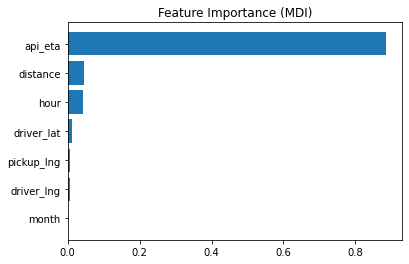

In [ ]:
# 최종 hw3 제출 
params = {'n_estimators': 300,
          'max_depth': 5,
          'min_samples_leaf': 100,
          'min_samples_split': 14,
          'learning_rate': 0.02,
          'loss': 'ls'} # 'squared_error'와 같음
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)
mse = mean_squared_error(y_test, reg.predict(x_test))
# mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.6f}".format(mse))
#print("The mean absolute error (MAE) on test set: {:.6f}".format(mae))

feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(eta_features)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()